In [1]:
import numpy as np
import numdifftools as nd
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
from scipy.integrate import solve_ivp
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import optimize
np.set_printoptions(precision=25)
%load_ext autoreload
%autoreload 2

In [2]:
from rushisland5 import *

In [3]:
# Pe = Eq*Iq + Ed*Id = Eq*(Vd-Ed)/Xqp + Ed*(Eq-Vq)/Xdp = (Eq*Vd - Ed*Vq)/Xdp
Pm1 = 4.8
Pm2 = 9.6

def f_w1(x):
    Eqp1 = x[0]
    Edp1 = x[1]
    Vd1 = np.real(f_Vdq(x)[0])
    Vq1 = np.imag(f_Vdq(x)[0])
    Pe = (Eqp1*Vd1 - Edp1*Vq1)/Xdp
    return 1 / (2 * H) * (Pm1 - Pe) # 6.8954233610562881


def f_w2(x):
    Eqp2 = x[7]
    Edp2 = x[8]
    Vd2 = np.real(f_Vdq(x)[1])
    Vq2 = np.imag(f_Vdq(x)[1])
    Pe = (Eqp2*Vd2 - Edp2*Vq2)/Xdp
    return 1 / (2 * H) * (Pm2 - Pe) # 7.5312971941631437


def f_VA1(x):
    Eqp1 = x[0]
    Edp1 = x[1]
    Vf1 = x[4]
    Va1 = x[5]
    Ve1 = x[6]
    Id1 = f_Id1(x)
    XadIfd = Eqp1 + (Xd - Xdp) * Id1
    Vfe = KD1 * XadIfd + KE1 * Ve1 + Aex1 * np.exp(Bex1 * Ve1)
    yf = KF1 / TF1 * (Vfe - Vf1)
    Vsum = 1.0586038003890010 - np.absolute(f_Vdq(x)[0]) - yf
    return (KA1 * Vsum - Va1) / TA1

def f_VA2(x):
    Eqp2 = x[7]
    Edp2 = x[8]
    Vf2 = x[11]
    Va2 = x[12]
    Ve2 = x[13]
    Id2 = f_Id2(x)
    XadIfd = Eqp2 + (Xd - Xdp) * Id2
    Vfe = KD2 * XadIfd + KE2 * Ve2 + Aex2 * np.exp(Bex2 * Ve2)
    yf = KF2 / TF2 * (Vfe - Vf2)
    Vsum = 1.0659163034132286 - np.absolute(f_Vdq(x)[1]) - yf
    return (KA2 * Vsum - Va2) / TA2


def sys_fun(x):
    fun = [f_Eqp1, f_Edp1, f_delta1, f_w1, f_VF1, f_VA1, f_VE1, f_Eqp2, f_Edp2, f_delta2, f_w2, f_VF2, f_VA2, f_VE2]
    #     J = np.array([nd.Jacobian(f)(x).ravel() for f in fun])
    #     J = J[:,:14]
    #     lam, v = np.linalg.eig(J)
    #     #lam = lam[abs(lam.imag).argsort()][::-1]
    #     print(lam)
    #     res = np.append(np.array([f(x).ravel() for f in fun]).ravel(), [lam[4].real,lam[5].real,lam[8].real,lam[9].real])
    #     return res
    return np.array([f(x).ravel() for f in fun]).ravel()

In [4]:
mu = 0.01*np.array([[-2.5, 5.117],[7.877, 3.754]]).dot([[Pm1-6.8954233610562881],[Pm2-7.5312971941631437]])
print(mu)
print(mu[1]/mu[0])
print(-1.3 * mu[0] + 58 * mu[0]**2)

[[ 0.15824110660107912]
 [-0.08739739481928827]]
[-0.5523052555466157]
[1.2466209348819741]


In [5]:
sys_fun(x)

array([ 2.4462400002247348e-13,  8.9385122874669238e-12,
       -1.9884958138562446e-26, -2.4892175827460394e-02,
       -1.9938961914717304e-12, -1.8302594008269402e-08,
        1.7626925560202485e-12,  1.9030014170685610e-13,
        1.5969425519637771e-11, -3.6531015914904231e-26,
        2.4574754168212531e-02, -9.3614005436393199e-13,
       -1.8749446439869644e-11,  1.2001795568768359e-12])

In [6]:
# sol = optimize.root(sys_fun, x, method='hybr')
# all_fun = [f_Eqp1,f_Edp1,f_delta1,f_w1,f_VF1,f_VA1,f_VE1,f_Eqp2,f_Edp2,f_delta2,f_w2,f_VF2,f_VA2,f_VE2]
# J = np.array([nd.Jacobian(f)(x).ravel() for f in all_fun])
# lam, v = np.linalg.eig(J) # Here we want to calculate the left eigenvecs, so use J_org.T; because use left eigvec makes it easier to calc transformation matrix
# print(lam)

In [7]:
sol = optimize.root(sys_fun, x, method='hybr')

J = Jacobian(sol.x)
lam, v = np.linalg.eig(J) # Here we want to calculate the left eigenvecs, so use J_org.T; because use left eigvec makes it easier to calc transformation matrix
print(lam)

[-10.827787154667433  +22.26619379683466j
 -10.827787154667433  -22.26619379683466j
  -1.1054430688142638  +8.420336317774638j
  -1.1054430688142638  -8.420336317774638j
  -0.0943046243509309  +5.153143821209698j
  -0.0943046243509309  -5.153143821209698j
  -6.209523708280829   +0.j
  -4.894815735312125   +0.j
   0.15713784449243573 +2.0335310625952183j
   0.15713784449243573 -2.0335310625952183j
  -3.0007546521765955  +0.j
  -1.1223372010140484  +0.7793387085218467j
  -1.1223372010140484  -0.7793387085218467j
  -1.0759430489110664  +0.j                ]


In [8]:
lam[4].real/lam[8].real

-0.6001394804385937

In [9]:
def func_ty(t, x): 
    return sys_fun(x)
# def Jac(t,x):
#     return np.array([nd.Jacobian(f)(x).ravel() for f in all_fun])  # Jacobian(x)

In [10]:
np.random.seed(1)
fs = 120
tend = 20
x0 = x.copy()

# x0[3]  = x0[3] + 0.002
# x0[10] = x0[10] + 0.002

atol = 1e-8
rtol = 1e-8


sol = solve_ivp(func_ty, [0,tend], x0, method='RK45', t_eval=np.arange(0,tend,1/fs), atol=atol, rtol=rtol)
# sol = solve_ivp(func_ty, [0,tend], x0, method='BDF', t_eval=np.arange(0,tend,1/fs), jac=Jac, atol=atol, rtol=rtol)
result = np.column_stack( (sol.t, sol.y.T) )

In [16]:
tspan = 60
x0 = sol.y[:,-1]
sol = solve_ivp(func_ty, [tend+1/fs,tend+tspan], x0, method='RK45', t_eval=np.arange(tend+1/fs,tend+tspan,1/fs), atol=atol, rtol=rtol)
# sol = solve_ivp(func_ty, [tend+1/fs,tend+tspan], x0, method='BDF', t_eval=np.arange(tend+1/fs,tend+tspan,1/fs), jac=Jac, atol=atol, rtol=rtol)
tend = tend+tspan
result = np.row_stack( (result, np.column_stack( (sol.t, sol.y.T) )) )

In [17]:
Efd = np.zeros((result.shape[0],2))
for i in range(result.shape[0]):
    x = result[i,1:]
    Efd[i,:] = [f_Efd(x[6], x[0] + (Xd - Xdp) * f_Id1(x), KC1), f_Efd(x[13], x[7] + (Xd - Xdp) * f_Id2(x), KC2)]

In [ ]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(14,18))
start, end = 0*fs, tend*fs

time = result[start:end,0]
data = result[start:end,1:]
for i in range(7):
    ax[i].plot(time, data[:,i],   label = 'Gen1')
    ax[i].plot(time, data[:,i+7], label = 'Gen2')

#ax[7].plot(time, Efd, label = 'Efd')


ax[0].set_ylabel('Eqp')
ax[1].set_ylabel('Edp')
ax[2].set_ylabel('delta')
ax[3].set_ylabel('w')
ax[4].set_ylabel('VF')
ax[5].set_ylabel('VA')
ax[6].set_ylabel('VE')
ax[7].set_ylabel('Efd')
ax[7].set_xlabel('time(sec)')

Text(0.5, 1.0, 'Frequency component during 50s ~ 100s')

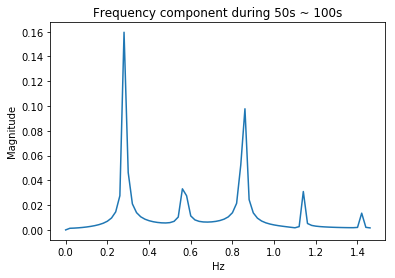

In [20]:
start = 50*120
end = 100*120

xt = result[start:end,3]
xt = xt - np.mean(xt,axis=0)
f = np.fft.fftfreq(len(xt), 1/120)
y = np.abs(np.fft.fft(xt,axis=0)) / len(f)

plt.plot(f[0:len(f)//80],y[0:len(f)//80])
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.title("Frequency component during {}s ~ {}s".format(int(start/120),int(end/120)))
# plt.title("Frequency component of the torus")

In [ ]:
import scipy.io as io
io.savemat('./results/Region2_6p6_7p8_EfdLim_StableLC_300sec.mat',{'data':result})

In [15]:
import scipy.io as io
result = io.loadmat('./results/7p1_7p4_4ksec.mat')
result = result['data']
fs = 120
# fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(14,14))
# start = 0*fs
# end = -1
# ax[0].plot(history.index[start:end], history.iloc[start:end,0])
# ax[1].plot(history.index[start:end], history.iloc[start:end,1])
# ax[2].plot(history.index[start:end], history.iloc[start:end,2])
# ax[3].plot(history.index[start:end], history.iloc[start:end,3])
# ax[4].plot(history.index[start:end], history.iloc[start:end,4])
# ax[5].plot(history.index[start:end], history.iloc[start:end,5])
# ax[6].plot(history.index[start:end], history.iloc[start:end,6])

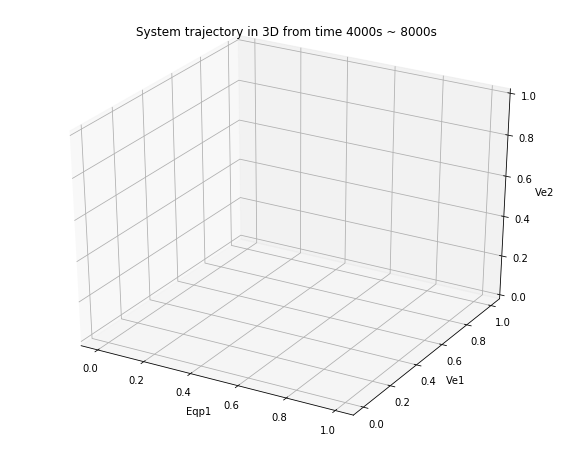

In [16]:
from mpl_toolkits.mplot3d import Axes3D
# fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
# ax[0][0].plot(data[:,0],data[:,7]);  ax[0][0].set_xlabel('Eqp1');   ax[0][0].set_ylabel('Eqp2')
# ax[0][1].plot(data[:,1],data[:,8]);  ax[0][1].set_xlabel('Edp1');   ax[0][1].set_ylabel('Edp2')
# ax[1][0].plot(data[:,2],data[:,9]);  ax[1][0].set_xlabel('delta1'); ax[1][0].set_ylabel('delta2')
# ax[1][1].plot(data[:,3],data[:,10]); ax[1][1].set_xlabel('w1');     ax[1][1].set_ylabel('w2')

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

start = 4000*fs
end = 8000*fs
data = result[start:end,1:]
xs = data[:,0]
ys = data[:,6]
zs = data[:,13]

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("Eqp1")
ax.set_ylabel("Ve1")
ax.set_zlabel("Ve2")
ax.set_title("System trajectory in 3D from time {}s ~ {}s".format(int(start/120),int(end/120)))
plt.show()

In [18]:
def trapezoidal(x_init, fun, jac, tstart, tend, dt=1/120, tol=1e-8, n_iter=50):
    xold = x_init.copy()
    time = np.array([tstart])
    y = np.array([x_init.copy()])
    t = tstart
    while t < tend:
        xguess = xold.copy()
        F = xguess - xold - dt/2 * (fun(xold) + fun(xguess))
        niter = 0
        converged = 0
        while not converged and niter < n_iter:
            dx = np.linalg.solve(np.eye(14) - dt/2 * jac(xguess), -F)
            xguess += dx
            F = xguess- xold - dt/2 * (fun(xold) + fun(xguess))
            niter += 1
            if np.linalg.norm(F, 2) < tol:
                converged = 1
        if converged:
            t += dt
            time = np.append(time, t)
            y = np.append(y, np.array([xguess]), axis=0)
            sys.stdout.write("t={:3f}, converged in {} iters \r".format(t, niter))
            sys.stdout.flush()
            xold = xguess.copy()
        else:
            sys.exit('maximum iter reached')
    return np.c_[time, y]

In [ ]:
all_fun = [f_Eqp1,f_Edp1,f_delta1,f_w1,f_VF1,f_VA1,f_VE1,f_Eqp2,f_Edp2,f_delta2,f_w2,f_VF2,f_VA2,f_VE2]
def Jac(x):
    return np.array([nd.Jacobian(f)(x).ravel() for f in all_fun])  # Jacobian(x)

In [ ]:
x0 = x.copy()
fs = 120
result_trap = trapezoidal(x0, sys_fun, Jac, tstart=0, tend=160)

In [ ]:
x0 = result_trap[-1,1:].copy()
result2 =  trapezoidal(x0, sys_fun, Jac, tstart=160, tend=165)
result_trap = np.r_[result_trap, result2]

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,5))
start, end = 100*fs, 3000*fs

time = result[start:end,0]
data = result[start:end,1:]
i=3
ax.plot(time, data[:,i],   label = 'Gen1')
# ax.plot(time, data[:,i+7], label = 'Gen2')

#[ax[i].legend() for i in range(7)]

ax.set_ylabel('w')
# ax.legend()
ax.set_xlabel('time(sec)')

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(result_trap[0:160*fs,5])
plt.plot(result[0:160*fs,5],'--')